<a href="https://colab.research.google.com/github/mc-juan-vargas-2024/cuadernos-y-proyectos-ia/blob/main/Fundamento_Cuaderno_9_Modelo_de_M%C3%A1quinas_de_Vectores_de_Soporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color="red">Cuaderno 9. Modelo de Máquinas de Vectores de Soporte (SVC)
Las Máquinas de Vectores de Soporte (SVM, por sus siglas en inglés) son un grupo de modelos de aprendizaje supervisado utilizados principalmente para clasificación (SVC), aunque también pueden aplicarse en problemas de regresión (SVR). El objetivo de una SVM es encontrar un hiperplano que separe las clases de datos de manera óptima.

## <font color="red">9.1 Fundamento Matemático de SVM
![imagen](https://github.com/adiacla/bigdata/blob/master/svc.jpg?raw=true)

Como se observa en la imagen anterior el principio detrás de SVM es encontrar el hiperplano de separación que maximiza el margen entre las diferentes clases (Maximun Margin) . Este margen se define como la distancia entre el hiperplano y los puntos de datos más cercanos de cualquier clase (estos puntos son llamados vectores de soporte- Support Vector).

Dado un conjunto de datos con $N$ muestras $\{(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)\}$, donde $x_i \in \mathbb{R}^n$ son las características (vectores de características) y $y_i \in \{-1, 1\}$ son las clases de salida (para clasificación binaria), el problema es encontrar un hiperplano de la forma:

  $w \cdot x + b = 0$

Donde:
* w es el vector normal al hiperplano.
* b es el sesgo (offset).

El margen es la distancia entre el hiperplano y los puntos más cercanos de cada clase. El objetivo de SVM es maximizar el margen. Esto lleva a un problema de optimización que se resuelve con restricciones de la siguiente forma:

  $\text{max} \quad \frac{2}{\|w\|}$

Sujeto a las restricciones de que las muestras sean clasificadas correctamente:

$y_i (w \cdot x_i + b) \geq 1 \quad \forall i$

## <font color="red">9.2 Optimización y Resolución
El objetivo es maximizar el margen, lo que equivale a minimizar la función de coste siguiente:

$J(w, b) = \frac{1}{2} ||w||^2$


Sujeta a las restricciones $y_i (w \cdot x_i + b) \geq 1 \quad \forall i$.Este es un problema de optimización convexa que puede resolverse utilizando el Método de Lagrange.

## <font color="red">9.3 Casos No Lineales (Kernel Trick)
El truco del kernel en las máquinas de vectores de soporte (SVM) es una técnica que permite transformar datos no linealmente separables en un espacio de mayor dimensión donde sí puedan ser separados por un hiperplano. Este truco se logra mediante una función de kernel, que aplica una transformación matemática a los datos sin necesidad de calcular explícitamente las nuevas coordenadas en el espacio de mayor dimensión.

### <font color="blue">9.3.1 ¿Cómo funciona el truco del kernel?
Cuando los datos no son linealmente separables en su espacio original, la idea del truco del kernel es mapear esos datos a un espacio de características de mayor dimensión. En este nuevo espacio, los datos pueden volverse separables, permitiendo que una SVM lineal pueda clasificar los datos correctamente.
* Kernel Lineal: No transforma los datos, solo los utiliza en su espacio original.
* Kernel Polinómico: Aplica una transformación polinómica a los datos.
* Kernel Gaussiano (RBF): Mapea los datos a un espacio de alta dimensión utilizando distancias radiales.

#### Ejemplo gráfico

![imagen](https://github.com/adiacla/bigdata/blob/master/kernel.jpg?raw=true)

Imagine que tienes dos clases de puntos en un plano 2D (como en el gráfico Input Space), y estas clases no son separables por una línea recta. Al aplicar el truco del kernel, transformamos estos puntos en un espacio tridimensional (en el gráfico Features Space), donde los puntos ahora son linealmente separables por un plano.

#### Explicación Visual:
* Plano 2D (No Linealmente Separables):
  * Los puntos de diferentes clases están mezclados y no se pueden separar con una línea recta.
* Espacio 3D (Aplicando el Truco del Kernel):
  * Al aplicar el truco del kernel, los puntos se transforman en un espacio de tres dimensiones. Ahora, con un plano, se puede separar perfectamente las clases.

Este proceso transforma la dificultad de la separación no lineal en un problema más manejable, utilizando técnicas como RBF Kernel o Kernel Polinómico, lo que mejora la capacidad del modelo para clasificar correctamente los datos.

### <font color="red">9.4 Implementación del Modelo SVC en Python con Datos de Alumnos

En este ejercicio, vamos a utilizar un clasificador de Máquinas de Vectores de Soporte (SVC, por sus siglas en inglés) para predecir el resultado de un estudiante (Aprobado o Reprobado) basado en dos características: las Horas de Estudio y la Asistencia. Los datos con los que vamos a trabajar son categóricos, por lo que antes de entrenar el modelo, utilizaremos un Label Encoder para convertir las categorías en valores numéricos.

El algoritmo SVC (Support Vector Classifier de https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) es una técnica de aprendizaje supervisado que busca encontrar el mejor hiperplano que separa las clases en el espacio de características. En este caso, utilizaremos un kernel lineal, lo que significa que asumimos que los datos son linealmente separables.

#### Explicación del Código
* Conjunto de Datos: Se crea un pequeño conjunto de datos con las características "Horas de Estudio", "Asistencia" y la etiqueta de "Resultado" (Sí/No). Los datos originales son categóricos.
* Codificación de Características: Utilizamos LabelEncoder para transformar las variables categóricas en números. Esto es necesario porque los algoritmos de clasificación como SVC requieren que las entradas sean numéricas.
* Entrenamiento del Modelo: Usamos el modelo SVC de sklearn para entrenar el clasificador con los datos codificados. El modelo se ajusta a los datos utilizando un kernel lineal.
* Predicción: Creamos una nueva observación (un estudiante con "Horas de Estudio" Alta y "Asistencia" Mala) y usamos el modelo entrenado para predecir su resultado.




#### Descripción Paso a Paso:
* Definir el Conjunto de Datos: Creamos un pequeño conjunto de datos donde cada fila corresponde a un estudiante con su número de Horas de Estudio (Alta o Baja), Asistencia (Buena o Mala), y el Resultado (Sí o No).


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data = {
    "Horas de Estudio": ["Alta", "Baja", "Baja", "Alta", "Alta"],
    "Asistencia": ["Buena", "Buena", "Mala", "Mala", "Buena"],
    "Resultado": ["Sí", "No", "No", "Sí", "Sí"]
}
df = pd.DataFrame(data)


* Codificación de Datos Categóricos: Como el algoritmo SVC solo puede trabajar con valores numéricos, usamos LabelEncoder para convertir las características y etiquetas categóricas en valores numéricos. Cada valor único en las columnas "Horas de Estudio", "Asistencia" y "Resultado" es asignado a un número.


In [ ]:


# Codificadores separados para cada característica y la etiqueta
encoder_estudio = LabelEncoder()
encoder_asistencia = LabelEncoder()

df["Horas de Estudio"] = encoder_estudio.fit_transform(df["Horas de Estudio"])
df["Asistencia"] = encoder_asistencia.fit_transform(df["Asistencia"])

# Codificar la etiqueta de resultado
y_encoder = LabelEncoder()
df["Resultado"] = y_encoder.fit_transform(df["Resultado"])


* Separación de Características y Etiqueta: Una vez que las características están codificadas numéricamente, las separamos en dos variables:
  * X: Las características (Horas de Estudio y Asistencia).
  * y: La etiqueta (Resultado).

In [ ]:
X = df[["Horas de Estudio", "Asistencia"]]
y = df["Resultado"]


* Entrenamiento del Modelo SVC: Creamos un modelo SVC utilizando un kernel lineal y lo entrenamos con las características y etiquetas codificadas. El kernel lineal es una opción común para problemas de clasificación cuando los datos son linealmente separables.


In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

* Realización de la Predicción: Creamos una nueva observación con características de "Horas de Estudio" Alta y "Asistencia" Mala, las codificamos numéricamente y las usamos para hacer una predicción. El modelo predice si el resultado será "Sí" o "No".

In [ ]:
new_observation = pd.DataFrame({
    "Horas de Estudio": [encoder_estudio.transform(["Alta"])[0]],  # Usar encoder_estudio
    "Asistencia": [encoder_asistencia.transform(["Mala"])[0]]    # Usar encoder_asistencia
})

prediction = model.predict(new_observation)
predicted_label = y_encoder.inverse_transform(prediction)
print("Predicción:", predicted_label[0])


Predicción: Sí


El resultado puede ser algo como:

"Predicción: Sí"

Esto significa que, según el modelo SVC entrenado, un estudiante con "Horas de Estudio" Alta y "Asistencia" Mala probablemente tendrá un resultado Aprobado.


---

## <font color="red">9.5 Ejercicio problemas cardiacos

En este ejercicio, vamos a trabajar con un conjunto de datos de pacientes donde intentamos predecir la presencia de problemas cardíacos utilizando las características de edad y colesterol. El objetivo es aplicar dos modelos de clasificación supervisada, Support vector Machine (SVC) , para resolver este problema y realizar una evaluación adecuada de los modelos.

En el proceso, vamos a seguir los siguientes pasos para cada modelo:
* Exploración y Análisis Exploratorio de Datos (EDA): Inspeccionar los datos para comprender su estructura, identificar valores faltantes y realizar un análisis preliminar.
* Imputación de Valores Faltantes: Dado que el conjunto de datos contiene valores nulos en las columnas de características, necesitamos imputarlos.
* Preprocesamiento: Incluye la numerización de variables categóricas (si las hay), la división de los datos en conjuntos de entrenamiento y prueba, y la normalización si es necesario.
* Entrenamiento del Modelo: Usar los modelos Naive Bayes para entrenar el modelo de clasificación.
* Evaluación: Evaluar el rendimiento del modelo utilizando métricas como la precisión (accuracy), la matriz de confusión, la curva ROC y el AUC.
* Persistencia del Modelo: Guardar el modelo entrenado para uso futuro.
* Predicciones con Nuevos Datos: Realizar predicciones con datos no vistos previamente.

### <font color="blue">9.5.1 Análisis Exploratorio de Datos (EDA)
Primero, cargamos los datos y realizamos una inspección básica para entender su estructura. Observamos que algunas columnas contienen valores nulos, lo que requiere que realicemos una imputación de los valores faltantes.

#### 1. Cargar los datos:




In [ ]:
import pandas as pd

# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/pacientes.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas para inspeccionar los datos
print(df.head())


   edad  colesterol  problema_cardiaco
0  63.0       233.0                  1
1   NaN       250.0                  0
2  37.0       250.0                  0
3  41.0       204.0                  0
4  56.0       236.0                  1


La salida de df.head() da una idea del formato y de las columnas: "edad", "colesterol" y "problema_cardiaco", donde "problema_cardiaco" es la variable objetivo (etiquetada).


---

### 2. Manejo de Datos Faltantes

El conjunto de datos contiene valores nulos. Los valores nulos en "edad" y "colesterol" deben imputarse antes de entrenar los modelos. En este caso, usaremos la mediana de las columnas para la imputación, ya que es menos sensible a los valores atípicos.

#### Imputación de Valores Faltantes:



In [ ]:
#Ver la sumatoria de valores nulos
df.isnull().sum()

,0
edad,2
colesterol,2
problema_cardiaco,0


Por indicaciones recibidas de los médicos que acompañan al proyecto, sugieren utilizar la mediana para imputar los datos faltantes.

In [ ]:

# Imputar los valores nulos con la mediana
df['edad'] = df['edad'].fillna(df['edad'].median())
df['colesterol'] = df['colesterol'].fillna(df['colesterol'].median())

# Comprobar que ya no hay valores nulos
print(df.isnull().sum())


edad                 0
colesterol           0
problema_cardiaco    0
dtype: int64


### 3. Preprocesamiento de Datos
Dado que tenemos valores numéricos en las columnas "edad" y "colesterol", no es necesario realizar codificación para las variables. Sin embargo, para algunos modelos, es importante normalizar los datos para asegurarnos de que las características estén en una escala similar.

#### Normalización de los Datos:


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar las características numéricas
scaler = StandardScaler()
df[['edad', 'colesterol']] = scaler.fit_transform(df[['edad', 'colesterol']])

# Ver los primeros datos después de la normalización
print(df.head())


       edad  colesterol  problema_cardiaco
0  0.960918   -0.276136                  1
1  0.076507    0.053328                  0
2 -1.913416    0.053328                  0
3 -1.471211   -0.838164                  0
4  0.187059   -0.217996                  1


### 4. División de Datos
Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba. Usaremos un 80% para el entrenamiento y un 20% para la prueba. Además, aplicaremos stratify para mantener la proporción de clases en el conjunto de entrenamiento y prueba.

#### División de los Datos:


In [ ]:
from sklearn.model_selection import train_test_split

# Definir las características y la etiqueta
X = df[['edad', 'colesterol']]
y = df['problema_cardiaco']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (241, 2)
Tamaño del conjunto de prueba: (61, 2)


## <font color="red">9.6 Soporte Vectorial (SVC) - Modelo de Clasificación
**Descripción del Modelo SVC:**

El Support Vector Machine (SVM) es un clasificador que busca un hiperplano de separación óptimo en un espacio multidimensional. SVC (Support Vector Classifier) es una variante de SVM para clasificación. SVC intenta maximizar el margen entre las clases mientras minimiza el error de clasificación.

**Entrenamiento del Modelo SVC:**


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Crear el modelo SVC
svc_model = SVC(probability=True, random_state=42)

# Entrenar el modelo
svc_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_svc = svc_model.predict(X_test)

# Evaluar el modelo
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Precisión SVC:", accuracy_svc)



Precisión SVC: 0.7540983606557377


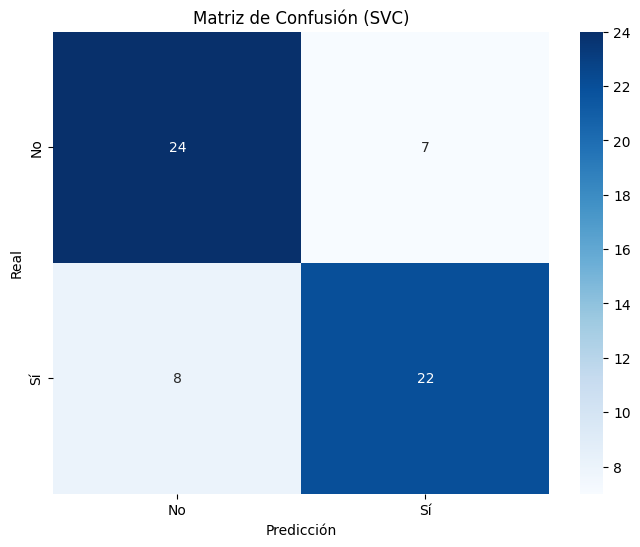

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (SVC)')
plt.show()


AUC SVC: 0.8811827956989248


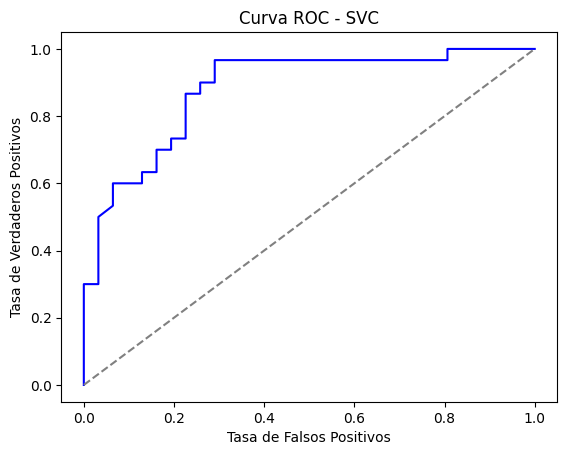

In [ ]:
# Calcular el AUC
roc_auc_svc = roc_auc_score(y_test, svc_model.predict_proba(X_test)[:, 1])
print("AUC SVC:", roc_auc_svc)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, svc_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curva ROC - SVC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()

### Persistencia del Modelo
Es importante guardar el modelo entrenado para usarlo en el futuro sin necesidad de reentrenarlo.

Guardar el modelo con **joblib:**

In [ ]:
import joblib

# Guardar el modelo SVC
joblib.dump(svc_model, 'svc_model.pkl')

['svc_model.pkl']

### Cargar el modelo guardado:


In [ ]:
# Cargar el modelo de SVM
svc_model_loaded = joblib.load('svc_model.pkl')